In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
!pip install xgboost
import xgboost

     ---------------------------------------- 70.9/70.9 MB 2.1 MB/s eta 0:00:00


In [2]:
import xgboost

In [26]:
from xgboost import XGBRegressor # complex regression problem

In [3]:
house_price_data=sklearn.datasets.load_boston() ## since the dataset is there in sklearn

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [5]:
print(house_price_data)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [7]:
# loading the datasets to pandas dataframe

house_price_dataframe=pd.DataFrame(house_price_data.data)
house_price_dataframe.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
## since we didnt give columns


house_price_dataframe=pd.DataFrame(house_price_data.data,columns=house_price_data.feature_names)
house_price_dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
## not imported target array-target column,house price

In [10]:
## add target

house_price_dataframe['price']=house_price_data.target
house_price_dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
## in a simple way - can load using path 


In [12]:
house_price_dataframe.shape

(506, 14)

In [13]:
## check missing values

house_price_dataframe.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [14]:
## no missing values

In [15]:
## statistical measures

house_price_dataframe.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# understanding the correlation btwn various features in the dataset

In [16]:
## positive correlation
## negative correlation

In [17]:
correlation=house_price_dataframe.corr()

<AxesSubplot:>

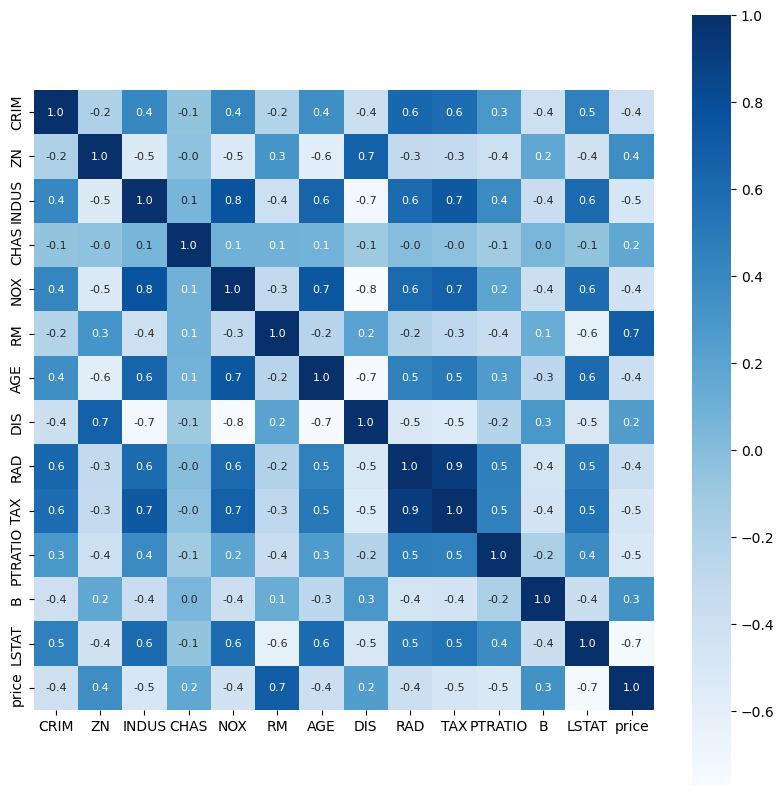

In [18]:
## constructing heatmap to understand the correlation

plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [ ]:
## for our own understanding

## splitting the data and target

In [19]:
x=house_price_dataframe.drop(['price'],axis=1)
y=house_price_dataframe['price']

In [20]:
print(x)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

In [21]:
print(y)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: price, Length: 506, dtype: float64


# splitting data into training and test data

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)
## noo stratify ..y.. dont forget this is regression

In [37]:
print(x.shape,x_train.shape,x_test.shape)

(506, 13) (404, 13) (102, 13)


## model training

In [24]:
# XGBoost Regressor-based on decision tree algorithm, decision tree ensemble model
# two or model togethor

In [38]:
# loading the model

model=XGBRegressor()

In [39]:
## training thee model with training data

model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

# evaluation of model

In [29]:
## regression problem, therefore: matrix- r sqaured error/mean absolute error


In [40]:
## accuracy predicting on training data
training_data_prediction=model.predict(x_train)
print(training_data_prediction)

[14.876002  19.662678  35.38007   11.998021  20.390879  23.706612
 21.056877  49.995255  27.457823  12.6294    17.396267  23.79792
 22.910114  18.55508   30.312103  31.195423  16.014763  23.31645
 15.006697  10.204298  12.5380125 19.61509   19.66136   19.49668
 15.00606   35.398483  13.506171  20.609844  24.682549  21.905018
 17.068335  23.6042    21.085814  15.601452  18.54477    8.306514
 14.520174  23.902676  11.800991  24.564783  24.801666  18.727734
 17.892405  48.79138   13.004631  29.595758  18.006918  20.08959
 17.288322  23.102274  22.6029    13.793123  43.816734  35.20019
 22.592157  17.42807   48.502285  31.503666  15.5974045 14.267436
 20.604322  22.033669  20.100742  17.582758  23.706852  14.12239
 19.792477  24.384455  33.405907  39.803566  34.905632  24.769258
 14.5926695 23.368898  33.820587  23.869007   9.64405   21.74419
 31.641304  14.484027   7.232553  24.102703  21.383333  17.198795
 46.000473  23.153412  14.497523  20.505415  17.008238  48.27686
 30.501759  20.618

In [41]:
## R squared error- find diff btwn y train and predicted

score_1=metrics.r2_score(y_train,training_data_prediction)

## Mean Absolute Error

score_2=metrics.mean_absolute_error(y_train,training_data_prediction)

print("R squared error:",score_1)
print("mean absolute error:", score_2)

R squared error: 0.9999932849235356
mean absolute error: 0.015959144818900775


In [ ]:
## both values are less, so good accuracy

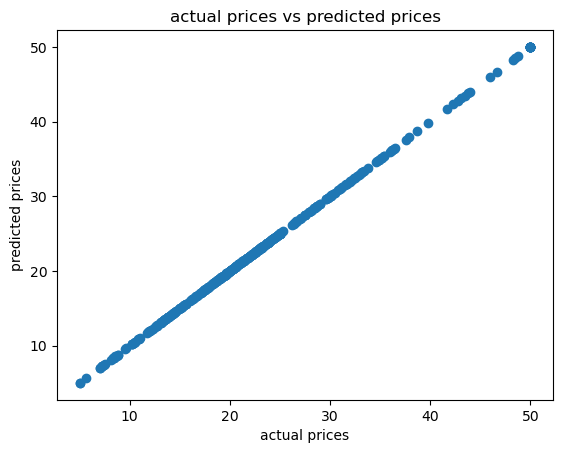

In [42]:
## visualizing the actual prices and predicted prices

plt.scatter(y_train,training_data_prediction)
plt.xlabel('actual prices')
plt.ylabel('predicted prices')
plt.title('actual prices vs predicted prices')
plt.show()

In [ ]:
## data points are very close to each other this indicates predicted and actual are almost same

In [44]:
## accuracy predicting on testing data

testing_data_prediction=model.predict(x_test)
print(testing_data_prediction)

[42.74622   19.78573   20.579105  32.79266   23.147135  21.640793
 13.5511465  7.9866385 19.791334  17.194458  16.244421  32.253292
 34.19664   25.787457   7.003338  11.719117  21.318201  16.468893
 12.669956  22.104694  22.134321  47.07059   22.810692  24.072947
 12.311422  27.259499  18.567297  21.642921  20.705463  21.544579
 14.354657  33.281105  20.685549  17.342514  17.56727   13.245988
 23.825132  34.77503   18.561607  23.183676  16.394434  10.197184
 20.75447   15.200618  20.092638  26.54555   21.025711  20.036818
 25.879812  20.611343  26.816973  23.094099  49.18955   19.1513
 22.06002   20.94343   48.06382   15.387839  29.111969  20.225601
 22.29728   20.20981   33.013508  28.561848  16.92323   25.429798
 36.950607  24.72117   27.07721   26.60588   24.435978  24.591536
 11.865473  32.709236   9.414646  20.4663    18.71708   24.253304
 20.398685  15.088908  24.507637  15.492835  15.776919  19.4121
 22.857258  11.413923  25.144564  10.709225  21.403887  23.246727
 20.132044  20

In [45]:
## R squared error- find diff btwn y train and predicted

score_1=metrics.r2_score(y_test,testing_data_prediction)

## Mean Absolute Error

score_2=metrics.mean_absolute_error(y_test,testing_data_prediction)

print("R squared error:",score_1)
print("mean absolute error:", score_2)

R squared error: 0.9279456534913544
mean absolute error: 1.8196323572420603


In [ ]:
## no much diff for train and test

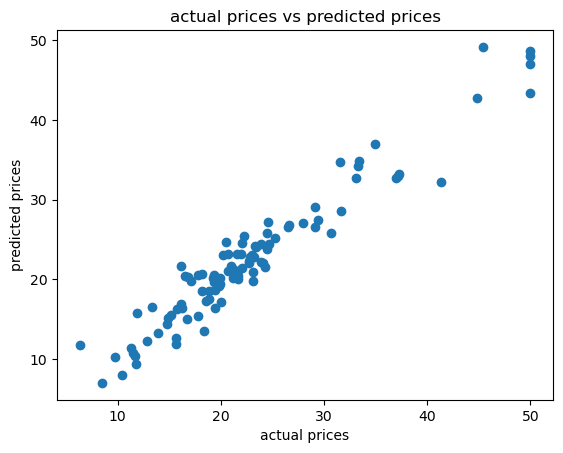

In [46]:
plt.scatter(y_test,testing_data_prediction)
plt.xlabel('actual prices')
plt.ylabel('predicted prices')
plt.title('actual prices vs predicted prices')
plt.show()

In [47]:
## can see the differnce here
## prediction on testing data is not as good as testing data

In [ ]:
## on testing data i simply checked

In [ ]:
## loaded the data as pandas dataframe
## understanding correlation btwn diff features and price
## seperated data as features and target
## splitting as traing and test data
## training model
## evaluating model
## visualising the accuracy
